In [1]:
## 실습 과제 : RFM 분석

In [ ]:
- 물건 사고 팔때 

In [ ]:
[필수 분석]

입점 기업별 RFM 분석(3그룹) 진행

매출 시각화

월별, 연도별 매출

월별 순수익 (처리 상황, 할부기간
고려)

결제 방법에 따른 분석

결제 방법과 결제금액의 연관성
분석

결제방법은 맨 앞의 한가지만
사용한 것으로 간주

In [246]:
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

[f.name for f in fm.fontManager.ttflist]

plt.rc('font', family='Malgun Gothic')

In [2]:
shop_data = pd.read_excel('../../Downloads/(반출금지) 미니프로젝트-쇼핑몰 실습데이터.xlsx')

In [3]:
shop_data

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [250]:
import pandas as pd
import numpy as np
# 판매금액 합계 계산
df_sum = shop_data.groupby('업체명')['판매금액'].sum().reset_index()
# 매출액 기준으로 그룹 지정
# bins는 매출액 범위를 정의합니다: [0, 10,000,000, 100,000,000, 무한대]
bins = [0, 10000000, 100000000, np.inf]
# labels는 각 범위에 대한 이름을 지정합니다.
labels = ['그 이하', '천만 단위', '억 단위']
# pd.cut 함수를 사용하여 각 업체를 매출액 범위에 따라 분류합니다.
df_sum['매출액 그룹'] = pd.cut(df_sum['판매금액'], bins=bins, labels=labels, right=False)
# 결과 출력
# 억 단위 그룹
billion_group = df_sum[df_sum['매출액 그룹'] == '억 단위']
print("억 단위 그룹:")
print(billion_group)
# 천만 단위 그룹
ten_million_group = df_sum[df_sum['매출액 그룹'] == '천만 단위']
print("\n천만 단위 그룹:")
print(ten_million_group)
# 그 이하 그룹
below_group = df_sum[df_sum['매출액 그룹'] == '그 이하']
print("\n그 이하 그룹:")
print(below_group)

억 단위 그룹:
             업체명        판매금액 매출액 그룹
7           다우기술  3687810416   억 단위
12          라온웍스   215238580   억 단위
49         에이스디포   316171800   억 단위
52          오피스퀵   218748500   억 단위
67          쥬크박스   110472470   억 단위
68            지니  1241881825   억 단위
69        지니 태블릿  1455928000   억 단위
70  지니 태블릿(후불집행)  1081872000   억 단위
72         천재태블릿  2362932000   억 단위

천만 단위 그룹:
            업체명      판매금액 매출액 그룹
2       가이스파트너스  18177500  천만 단위
3        거영아이앤디  36582310  천만 단위
5          네오필립  11158200  천만 단위
6          뉴트리원  13811400  천만 단위
8         더싸다닷컴  53118000  천만 단위
9           드림빌  35672790  천만 단위
18   리얼리티리테일코리아  11711100  천만 단위
20        리틀램스쿨  10405880  천만 단위
31    블루스톤익스체인지  90914460  천만 단위
32       비전플레이스  16460000  천만 단위
33       비즈마켓렌탈  24392730  천만 단위
34          빅픽처  45763100  천만 단위
38        셀러테스트  21422300  천만 단위
40         스테툴스  11344080  천만 단위
41      싱크로드코리아  17235800  천만 단위
42       아이엔리테일  28435000  천만 단위
43        아토코리아  14220500  천만 단위
44           알파  41057164 

In [251]:
shop_data = pd.merge(shop_data, df_sum[['업체명', '매출액 그룹']], on='업체명', how='left')

In [252]:
shop_data

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,매출액 그룹
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,억 단위
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,억 단위
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,억 단위
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,억 단위
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,억 단위
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,억 단위
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,억 단위
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,억 단위
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,억 단위


In [257]:
def is_numeric(s):
    try:
        pd.to_numeric(s)
        return True
    except ValueError:
        return False

In [259]:
numeric_check = shop_data['판매금액'].apply(is_numeric)


In [260]:
print(numeric_check)
print("모든 값이 숫자로 변환 가능한가?:", numeric_check.all())

0         True
1         True
2         True
3         True
4         True
          ... 
218596    True
218597    True
218598    True
218599    True
218600    True
Name: 판매금액, Length: 218601, dtype: bool
모든 값이 숫자로 변환 가능한가?: True


In [261]:
shop_data['주문일자'] = pd.to_datetime(shop_data['주문일자'])

In [266]:
latest_order_dates = shop_data.groupby('매출액 그룹')['주문일자'].agg('max').idxmax()
idx = shop_data.groupby('매출액 그룹')['주문일자'].idxmax()

C:\Users\user\AppData\Local\Temp\ipykernel_15516\1299707103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  latest_order_dates = shop_data.groupby('매출액 그룹')['주문일자'].agg('max').idxmax()
C:\Users\user\AppData\Local\Temp\ipykernel_15516\1299707103.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx = shop_data.groupby('매출액 그룹')['주문일자'].idxmax()


In [267]:
latest_order_dates = shop_data.loc[idx]

In [268]:
latest_order_dates

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,매출액 그룹
218439,221107212219979,맨도롱,[맛의 신세계] 피코크-너비아니 550gX3봉+무료배송(제주도/도서산간 배송불가),(주)신세계푸드 음성공장,1,17600,신용카드,2022-11-07 21:19:59,주문취소,N,NaN,NaN,그 이하
218548,221108015929937,알파,[시스맥스] 점보꽂이 32101(W86*D248*H292mm)-색상선택,-,2,4900,신 + 포,2022-11-08 01:57:09,배송준비,N,NaN,NaN,천만 단위
218600,221108105148171,다우기술,[특별한 크리스마스] 2차-신세계 상품권 모바일 교환권-1만원권,신세계,17,161500,신용카드,2022-11-08 10:49:28,배송완료,N,NaN,NaN,억 단위


In [269]:
import pandas as pd
import numpy as np
import datetime as dt
# 억 단위 그룹 업체명 리스트 추출
billion_shop_names = billion_group['업체명'].tolist()
# 원본 데이터에서 억 단위 그룹 데이터만 필터링
billion_shop_data = shop_data[shop_data['업체명'].isin(billion_shop_names)]
# 현재 날짜 설정
NOW = dt.datetime(2024,5,24)
# RFM 데이터 계산
rfmTable = billion_shop_data.groupby('업체명').agg({
    '주문일자': lambda x: (NOW - x.max()).days, # Recency: '구매일자'가 최근 구매일을 나타내는 열이라고 가정
    '업체명': lambda x: len(x),                   # Frequency
    '판매금액': lambda x: x.sum()                  # Monetary Value
})
# 열 이름 변경
rfmTable.rename(columns={'주문일자': 'recency',
                         '업체명': 'frequency',
                         '판매금액': 'monetary_value'}, inplace=True)
# RFM 점수 계산 및 분류는 여기서 추가로 진행할 수 있습니다.
# 결과 출력
print(rfmTable)

              recency  frequency  monetary_value
업체명                                             
다우기술              562      85553      3687810416
라온웍스              563       3934       215238580
에이스디포             562       8388       316171800
오피스퀵              563       7173       218748500
쥬크박스              562      18661       110472470
지니                562      61835      1241881825
지니 태블릿            846       1506      1455928000
지니 태블릿(후불집행)      723       1297      1081872000
천재태블릿             562       2891      2362932000


In [272]:
import pandas as pd
import numpy as np
import datetime as dt
# 억 단위 그룹 업체명 리스트 추출
ten_million_group_shop_names =ten_million_group['업체명'].tolist()
# 원본 데이터에서 억 단위 그룹 데이터만 필터링
ten_million_group_shop_data = shop_data[shop_data['업체명'].isin(ten_million_group_shop_names)]
# 현재 날짜 설정
NOW = dt.datetime(2024,5,24)
# RFM 데이터 계산
rfmTable = ten_million_group_shop_data.groupby('업체명').agg({
    '주문일자': lambda x: (NOW - x.max()).days, # Recency: '구매일자'가 최근 구매일을 나타내는 열이라고 가정
    '업체명': lambda x: len(x),                   # Frequency
    '판매금액': lambda x: x.sum()                  # Monetary Value
})
# 열 이름 변경
rfmTable.rename(columns={'주문일자': 'recency',
                         '업체명': 'frequency',
                         '판매금액': 'monetary_value'}, inplace=True)
# RFM 점수 계산 및 분류는 여기서 추가로 진행할 수 있습니다.
# 결과 출력
print(rfmTable)

             recency  frequency  monetary_value
업체명                                            
가이스파트너스          861        306        18177500
거영아이앤디           563       4384        36582310
네오필립            1032         89        11158200
뉴트리원             869        337        13811400
더싸다닷컴            590        172        53118000
드림빌              588        351        35672790
리얼리티리테일코리아       570         99        11711100
리틀램스쿨            567        495        10405880
블루스톤익스체인지        569       1871        90914460
비전플레이스           617         15        16460000
비즈마켓렌탈           701         27        24392730
빅픽처              792       1262        45763100
셀러테스트           1007        193        21422300
스테툴스             563        381        11344080
싱크로드코리아          917         22        17235800
아이엔리테일           596        363        28435000
아토코리아            729        302        14220500
알파               562       3688        41057164
애쓰다              566        157        1

In [273]:
import pandas as pd
import numpy as np
import datetime as dt
# 억 단위 그룹 업체명 리스트 추출
below_group_shop_names =below_group['업체명'].tolist()
# 원본 데이터에서 억 단위 그룹 데이터만 필터링
below_group_shop_data = shop_data[shop_data['업체명'].isin(below_group_shop_names)]
# 현재 날짜 설정
NOW = dt.datetime(2024,5,24)
# RFM 데이터 계산
rfmTable = below_group_shop_data.groupby('업체명').agg({
    '주문일자': lambda x: (NOW - x.max()).days, # Recency: '구매일자'가 최근 구매일을 나타내는 열이라고 가정
    '업체명': lambda x: len(x),                   # Frequency
    '판매금액': lambda x: x.sum()                  # Monetary Value
})
# 열 이름 변경
rfmTable.rename(columns={'주문일자': 'recency',
                         '업체명': 'frequency',
                         '판매금액': 'monetary_value'}, inplace=True)
# RFM 점수 계산 및 분류는 여기서 추가로 진행할 수 있습니다.
# 결과 출력

print(rfmTable)

           recency  frequency  monetary_value
업체명                                          
7321디자인        569         77          349200
가베             568        348         7895940
그린피앤에스         563        278         3001160
디자인다소          583         18          480720
라씨오날에듀         575         24          744500
래시드            567          8          263500
럭스럭스           889        118         3721880
레인트리           678         28          247190
로렌츄컴퍼니         833         23          569880
로즈마켓           615         11          410800
리체             567          4           78900
링커블테크놀러지       582          3          107700
마스크공작소        1148         70         6004400
만들기대장          574        106         3063750
매직북스           575         92          572660
맨도롱            563         17          354200
메디쿼터스          566          6          153000
모든오피스         1239        336         6581260
뮤템             576         50          372120
바나나코퍼레이션       563          9     

In [4]:
canceled_rows = shop_data[shop_data['처리상태'] == '상담취소']

# '상담취소'인 행의 개수를 셉니다.
num_canceled = len(canceled_rows)

In [5]:
num_canceled

143

In [6]:
shop_data['처리상태'].value_counts()

처리상태
구매확정       159291
미결제         49574
주문취소         6269
배송완료         1445
환불완료          785
배송준비          527
배송중           320
환불승인          163
상담취소          143
결제완료           28
부분환불           23
부분취소           16
시안확인요청          6
교환완료            4
후불반려            4
환불요청            2
상담형상품접수         1
Name: count, dtype: int64

In [7]:
shop_data[shop_data['처리상태'] =='부분취소']['판매금액'].sum()

900930

In [9]:
sales = shop_data[(shop_data['처리상태'] == '구매확정') | 
                    (shop_data['처리상태'] == '배송완료') | 
                    (shop_data['처리상태'] == '배송중') |
                    (shop_data['처리상태'] == '배송준비')|
                    (shop_data['처리상태'] == '결제완료')]

In [10]:
sales

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [11]:
sales['연월'] = sales['주문일자'].apply(lambda x: str(x)[:7])
sales['연도별'] = sales['주문일자'].apply(lambda x: str(x)[:4])
sales['월'] = sales['주문일자'].apply(lambda x: str(x)[5:7])

C:\Users\user\AppData\Local\Temp\ipykernel_15516\2052865637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['연월'] = sales['주문일자'].apply(lambda x: str(x)[:7])
C:\Users\user\AppData\Local\Temp\ipykernel_15516\2052865637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['연도별'] = sales['주문일자'].apply(lambda x: str(x)[:4])
C:\Users\user\AppData\Local\Temp\ipykernel_15516\2052865637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [12]:
sales

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,연월,연도별,월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,2019-12,2019,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,2019-12,2019,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,2019-12,2019,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,2019-12,2019,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,2019-12,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,2022-11,2022,11
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,2022-11,2022,11
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,2022-11,2022,11
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,2022-11,2022,11


In [13]:
sales[sales['연도별'] == '2019']['판매금액'].sum()

5007580

In [16]:
sales[sales['연도별'] == '2020']['판매금액'].sum()

1046007575

In [21]:
sales[sales['월'] == '12']['판매금액'].sum()

575876348

In [22]:
sales[sales['월'] == '11']['판매금액'].sum()

480132604

In [63]:
monthly_sales = sales.groupby('월')['판매금액'].sum().reset_index()

In [64]:
monthly_sales

,월,판매금액
0,01,577639300
1,02,756443825
2,03,989788885
3,04,595245808
4,05,1044829970
5,06,487594235
6,07,504010990
7,08,686551760
8,09,655901140
9,10,912470253


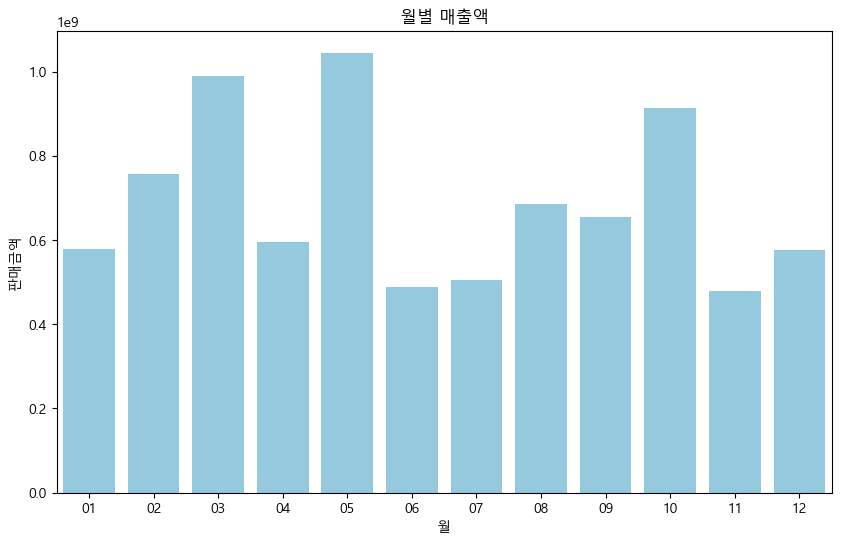

In [66]:
plt.figure(figsize=(10, 6))
bar_color = 'skyblue'
sns.barplot(x='월', y='판매금액', data=monthly_sales, color = bar_color)
plt.title('월별 매출액')
plt.xlabel('월')
plt.ylabel('판매금액')
plt.show()

In [68]:
year_sales = sales.groupby('연도별')['판매금액'].sum().reset_index()

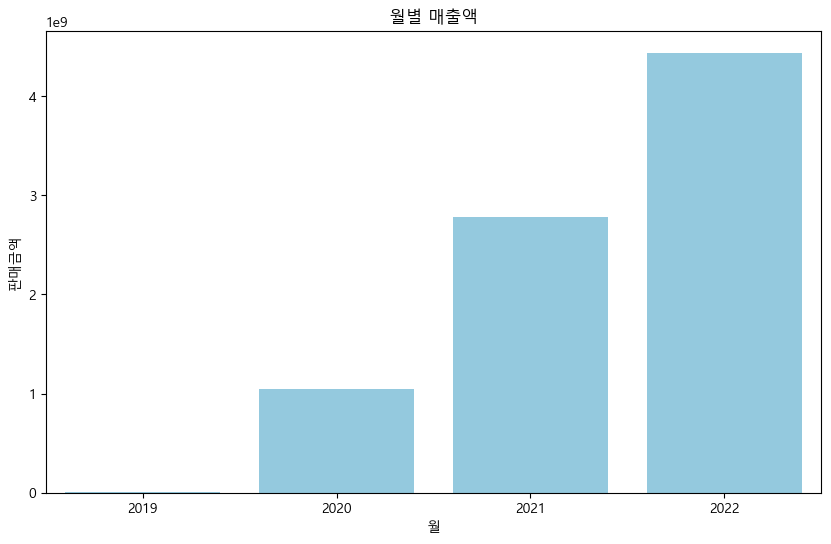

In [69]:
plt.figure(figsize=(10, 6))
bar_color = 'skyblue'
sns.barplot(x='연도별', y='판매금액', data=year_sales, color = bar_color)
plt.title('월별 매출액')
plt.xlabel('월')
plt.ylabel('판매금액')
plt.show()

In [120]:
confirm = shop_data[(shop_data['처리상태'] == '구매확정')]

In [121]:
confirm

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN


In [122]:
confirm['판매금액'].isna().value_counts()

판매금액
False    159291
Name: count, dtype: int64

In [123]:
confirm['판매금액'] = confirm['판매금액'].astype(int)


C:\Users\user\AppData\Local\Temp\ipykernel_15516\1140253075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirm['판매금액'] = confirm['판매금액'].astype(int)


In [124]:
confirm['할부기간'] = confirm['할부기간'].apply(lambda x: x.replace('개월', '') if pd.notna(x) else x)
confirm['할부기간'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_15516\1043150682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirm['할부기간'] = confirm['할부기간'].apply(lambda x: x.replace('개월', '') if pd.notna(x) else x)


array([nan, '12', '24', '1', '6', '18'], dtype=object)

In [127]:
confirm['할부기간_n'] = confirm['할부기간'].notna()

C:\Users\user\AppData\Local\Temp\ipykernel_15516\3355875033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirm['할부기간_n'] = confirm['할부기간'].notna()


In [128]:
confirm['할부기간_n'] = confirm['할부기간_n'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_15516\1502562833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirm['할부기간_n'] = confirm['할부기간_n'].astype(int)


In [131]:
def calculate_monthly_sales(row):
    if row['할부기간_n'] > 0:
        return row['할부기간_n'] / row['할부기간_n']
    else:
        return np.nan

confirm['월별_판매금액'] = confirm.apply(calculate_monthly_sales, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_15516\1658695037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirm['월별_판매금액'] = confirm.apply(calculate_monthly_sales, axis=1)


In [132]:
confirm

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,할부기간_n,월별_판매금액
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,NaN,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,0,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,NaN,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,NaN,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,NaN,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,NaN,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200.0,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN,0,NaN
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550.0,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN,0,NaN
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800.0,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN,0,NaN
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400.0,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN,0,NaN


In [136]:
confirm['월별_판매금액'].value_counts()

월별_판매금액
1.0    1591
Name: count, dtype: int64

In [ ]:
shop_data

In [160]:
shop_pay = shop_data.copy()

In [161]:
shop_pay 

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [164]:
shop_pay['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [165]:
replace_map = {
    '신 + 포': '신용카드',
    '신 + 적 + 포': '신용카드',
    '신 + 적': '신용카드',
    '신 + 웰컴': '신용카드',
    '적 + 포': '적립금',
    '후 + 포': '후불',
    '후 + 적 + 포': '후불',
    '후 + 적': '후불',
    '정 + 포': '정기결제',
    '정 + 적 + 포': '정기결제',
    '정 + 적': '정기결제',
    '현 + 적': '현금간편결제',
    '현 + 포': '현금간편결제',
    '현 + 적 + 포': '현금간편결제'
}

# '결제방법' 열의 값을 한 번에 대체
shop_pay['결제방법'] = shop_pay['결제방법'].replace(replace_map)





In [166]:
shop_pay['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '포인트', '적립금', '웰컴마일', '정기결제',
       '현금간편결제', '-', ' + 포'], dtype=object)

In [167]:
shop_pay = shop_pay.dropna(subset=['결제방법'])

In [168]:
shop_pay = shop_pay[~shop_pay['결제방법'].isin(['-', ' + 포'])]

In [170]:
shop_pay['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '포인트', '적립금', '웰컴마일', '정기결제',
       '현금간편결제'], dtype=object)

In [213]:
shop_pay['결제방법'].value_counts()

결제방법
신용카드      166050
포인트        29767
웰컴마일        7487
현금간편결제      7347
적립금         4586
정기결제        1583
후불           355
가상계좌          45
무통장입금          4
Name: count, dtype: int64

In [207]:
shop_pay[(shop_pay['결제방법'] == '신용카드')]['판매금액'].sum()

7229664135

In [226]:
shop_pay

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신용카드,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [232]:
# 현금으로 합치기

replace_pay = {
    '현금간편결제' : '현금',
    '가상계좌' : '현금',
    '무통장입금' : '현금'
}

# '결제방법' 열의 값을 한 번에 대체
shop_pay['결제방법'] = shop_pay['결제방법'].replace(replace_pay)



In [233]:
shop_pay

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신용카드,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


## boxplot으로 만든 결제방법과 결제수단의 연관 

<Axes: xlabel='결제방법', ylabel='판매금액'>

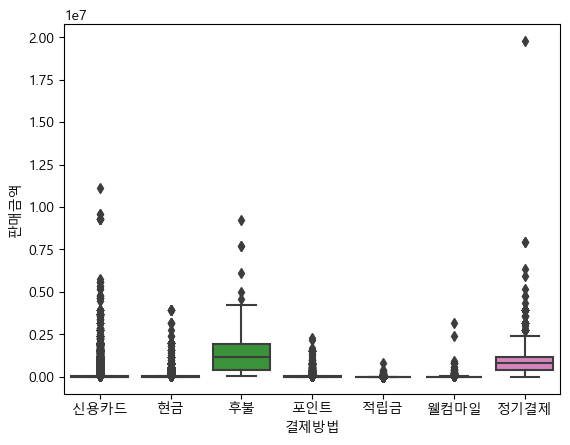

In [248]:
sns.boxplot( data = shop_pay, x = '결제방법' , y = '판매금액')

In [244]:
statistic, p_value = stats.ks_2samp(shop_pay['결제방법'], shop_pay['판매금액'])

TypeError: '<' not supported between instances of 'str' and 'int'

In [243]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(shop_pay['결제방법'], shop_pay['판매금액']))
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

카이제곱 통계량: 350460.36710420944
p-value: 0.0


, p-value가 0에 매우 가까우므로 매우 유의하다고 볼 수 있습니다. 
즉, 결제방법과 판매금액 간에는 통계적으로 유의한 관계가 있음을 의미합니다. 
그리고 카이제곱 통계량이 매우 높으므로 두 변수 간의 연관성이 높다고 할 수 있습니다.







In [238]:
shop_pay['결제방법'].value_counts()

결제방법
신용카드    166050
포인트      29767
웰컴마일      7487
현금        7396
적립금       4586
정기결제      1583
후불         355
Name: count, dtype: int64

In [239]:
shop_pay['결제방법'].value_counts().sum()

217224

In [247]:
import statsmodels.api as sm

X = shop_pay['결제방법']  # 범주형 독립 변수
y = shop_pay['판매금액']

X = sm.add_constant(X)

# 선형 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
shop_pay.groupby('결제방법', as_index = False).agg( rel = ('판매금액' , 'sum')).sort_values('rel' ,ascending = False)

In [236]:
shop_pay[(shop_pay['결제방법'] == '신용카드')]['판매금액'].sum()

7229664135

In [237]:
shop_pay[(shop_pay['결제방법'] == '후불')]['판매금액'].sum()

490479000

In [230]:
relative = shop_pay.groupby('결제방법', as_index = False).agg( rel = ('판매금액' , 'sum')).sort_values('rel' ,ascending = False)

In [219]:
relative['현금'] = relative['현금간편결제'] + relative['가상계좌'] + relative['무통장입금 '] 

KeyError: '현금간편결제'

In [185]:
relative

,결제방법,rel
2,신용카드,7229664135
5,정기결제,1490893200
6,포인트,618818225
8,후불,490479000
7,현금간편결제,406303765
3,웰컴마일,108139095
4,적립금,49714845
0,가상계좌,2079090
1,무통장입금,87150


In [220]:
 406303765+2079090+ 87150

408470005

In [222]:
payment = pd.DataFrame ( { '결제방법' : ['신용카드' ,'정기결제' , '포인트' , '후불','현금' ,'적립금'],
                           '판매총금액': [7229664135 , 1490893200, 618818225, 490479000 ,  8470005 , 49714845] })

In [223]:
payment

,결제방법,판매총금액
0,신용카드,7229664135
1,정기결제,1490893200
2,포인트,618818225
3,후불,490479000
4,현금,8470005
5,적립금,49714845


<Axes: xlabel='결제방법', ylabel='판매총금액'>

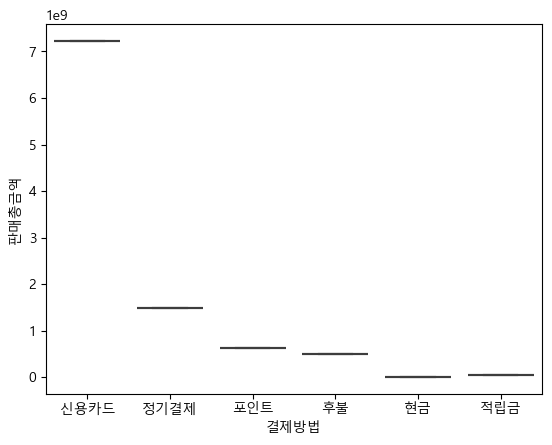

In [225]:
sns.boxplot( data = payment, x = '결제방법' , y = '판매총금액')

In [ ]:
신용카드 / 정기결제 / 포인트 /후불 / 현금 +가상 + 무통입금 / 적립금 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '신용카드'),
  Text(1, 0, '정기결제'),
  Text(2, 0, '포인트'),
  Text(3, 0, '후불'),
  Text(4, 0, '현금간편결제'),
  Text(5, 0, '웰컴마일'),
  Text(6, 0, '적립금'),
  Text(7, 0, '가상계좌'),
  Text(8, 0, '무통장입금')])

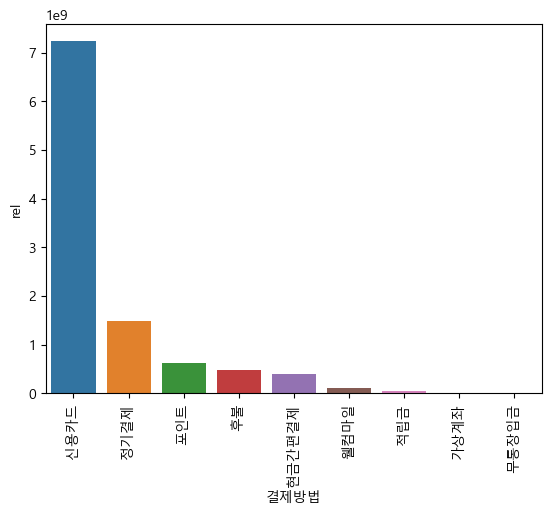

In [217]:
sns.barplot( data = relative, x = '결제방법' , y = 'rel'),            
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '신용카드'),
  Text(1, 0, '가상계좌'),
  Text(2, 0, '후불'),
  Text(3, 0, '무통장입금'),
  Text(4, 0, '포인트'),
  Text(5, 0, '적립금'),
  Text(6, 0, '웰컴마일'),
  Text(7, 0, '정기결제'),
  Text(8, 0, '현금간편결제')])

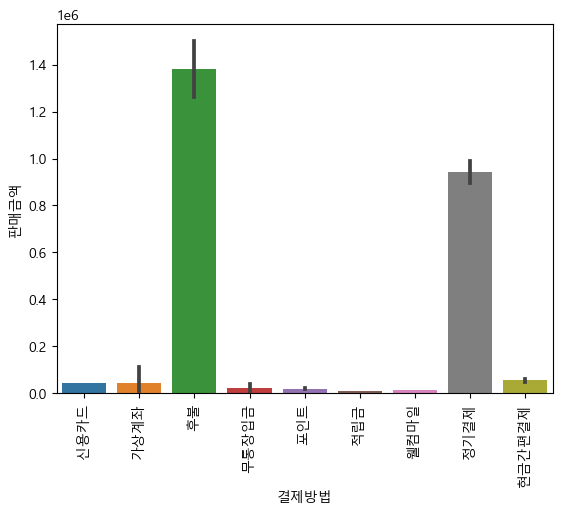

In [218]:
# boxplot 이용하여 시각화로 연관성 분석

sns.barplot(data = shop_pay, x = '결제방법' , y = '판매금액')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '신용카드'),
  Text(1, 0, '가상계좌'),
  Text(2, 0, '후불'),
  Text(3, 0, '무통장입금'),
  Text(4, 0, '포인트'),
  Text(5, 0, '적립금'),
  Text(6, 0, '웰컴마일'),
  Text(7, 0, '정기결제'),
  Text(8, 0, '현금간편결제')])

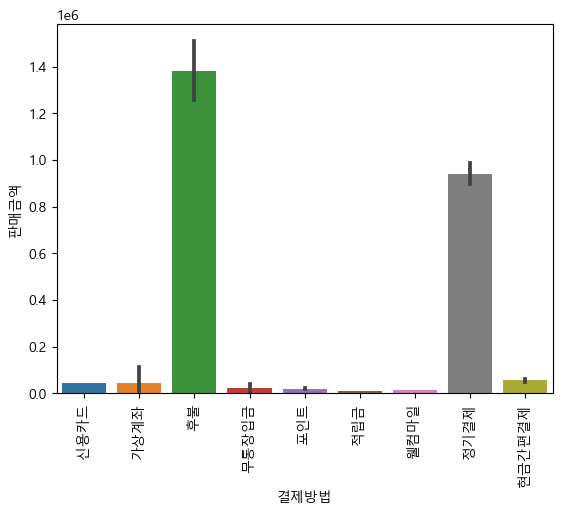

In [201]:
sns.barplot( data = shop_pay , x = '결제방법' , y = '판매금액')
plt.xticks(rotation=90)

## 카이제곱 검정 사용

In [195]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(shop_pay['결제방법'], shop_pay['판매금액']))
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

카이제곱 통계량: 362059.5463838397
p-value: 0.0


카이제곱 통계량은 두 범주형 변수 간의 관련성을 나타내는 값으로, 값이 클수록 두 변수 간에 강한 관련성이 있음을 나타냅니다. 일반적으로 카이제곱 통계량이 클수록 두 변수 간의 관련성이 강하고, 값이 작을수록 두 변수 간의 관련성이 약하다고 판단됩니다.

p-value는 카이제곱 통계량에 대한 유의성을 나타내는 값으로, 0과 1 사이의 값을 가집니다. p-value가 작을수록 (일반적으로 0.05보다 작을 경우), 카이제곱 통계량이 유의하다는 것을 의미하며, 두 변수 간의 관련성이 통계적으로 유의하다는 것을 나타냅니다.

따라서 여기서 카이제곱 통계량이 362059.5463838397로 매우 크며, p-value가 0에 매우 가까운 값으로 나타났습니다. 이는 두 변수 간의 관련성이 통계적으로 유의하다는 것을 의미합니다. 즉, '결제방법'과 '판매금액' 사이에는 통계적으로 유의한 관련성이 있다고 할 수 있습니다.

## RFM 분석

- 최근이라는 기간을 어떻게 정의할 것인가 ?
- 어떤 종류의 상품이나 서비스가 최근에 많이 팔리는가?
- 최근에 구매한 것 중 구매 빈도수가 높은것은 무엇인가 ?
- 어떤 종류의 상품이 고객들에게 자주 팔리는가 ?
- 어떤 상품이 높은 매출을 기록하는가 ?
- 